In [1]:
import numpy as np
from effFunctions import getMuonRecoEff,getTriggerEff,getTrackEff,getSelectionEff,getTargetMass,getMassSelEff

from effFunctions import gridPtsTrig,gridPtsSel,gridPtsHigh,gridPtsLow

import itertools
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

### Get Muon Reconstruction Efficiency

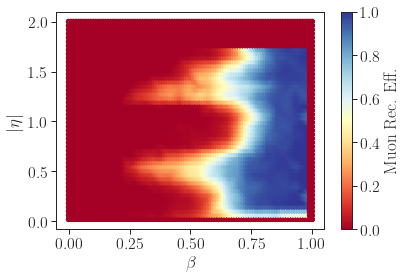

In [2]:

betaVals = np.linspace(0.,1.,100)
etaVals = np.linspace(-2.,2.,100)
eff = np.array([[beta,abs(eta),getMuonRecoEff(beta,eta)] for (beta,eta) in itertools.product(betaVals,etaVals)])
plt.scatter(eff[:,0],eff[:,1],c=eff[:,2],cmap=cm)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$|\eta|$')
plt.colorbar(label='Muon Rec. Eff.')
plt.show()

### Get Trigger efficiency

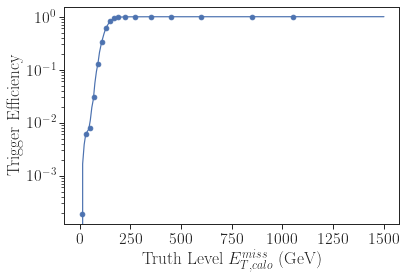

In [3]:
                 

metVals = np.linspace(0.,1500.,200)
eff = [getTriggerEff(met) for met in metVals]
plt.plot(metVals,eff)
plt.scatter(gridPtsTrig['Truth_Level_ETmiss_calo_GeV'],gridPtsTrig['Efficiency'])
plt.yscale('log')
plt.xlabel(r'Truth Level $E_{T,calo}^{miss}$ (GeV)')
plt.ylabel('Trigger Efficiency')
plt.show()

### Get Event Selection Efficiency

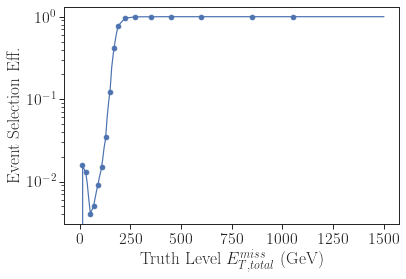

In [4]:
metVals = np.linspace(0.,1500.,200)
eff = [getSelectionEff(met) for met in metVals]
plt.plot(metVals,eff)
plt.scatter(gridPtsSel['Truth_Level_ETmiss_Total_GeV'],gridPtsSel['Efficiency'])
plt.yscale('log')
plt.xlabel(r'Truth Level $E_{T,total}^{miss}$ (GeV)')
plt.ylabel('Event Selection Eff.')
plt.show()

### Get Track Selection Efficiency

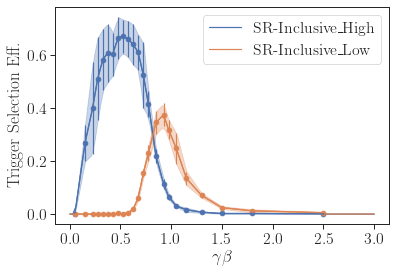

In [5]:
gbeta = np.linspace(0.,3.,100)
effHigh = [getTrackEff(gb,sr='High') for gb in gbeta]
effHighP = [getTrackEff(gb,sr='High',use='higher') for gb in gbeta]
effHighM = [getTrackEff(gb,sr='High',use='lower') for gb in gbeta]

effLow = [getTrackEff(gb,sr='Low') for gb in gbeta]
effLowP = [getTrackEff(gb,sr='Low',use='higher') for gb in gbeta]
effLowM = [getTrackEff(gb,sr='Low',use='lower') for gb in gbeta]


a = plt.plot(gbeta,effHigh,label='SR-Inclusive_High')
plt.fill_between(gbeta,effHighM,effHighP,color = a[0].get_color(), alpha=0.3)

b = plt.plot(gbeta,effLow,label='SR-Inclusive_Low')
plt.fill_between(gbeta,effLowM,effLowP,color = b[0].get_color(), alpha=0.3)

errHigh = (gridPtsHigh['error_']-gridPtsHigh['error__1'])/2.
plt.errorbar(gridPtsHigh['beta__gamma'],gridPtsHigh['Efficiency'],yerr=errHigh,
             color = a[0].get_color())

errLow = (gridPtsLow['error_']-gridPtsLow['error__1'])/2.             
plt.errorbar(gridPtsLow['beta__gamma'],gridPtsLow['Efficiency'],yerr=errLow,
             color = b[0].get_color())

plt.scatter(gridPtsHigh['beta__gamma'],gridPtsHigh['Efficiency'],
             color = a[0].get_color())             
plt.scatter(gridPtsLow['beta__gamma'],gridPtsLow['Efficiency'],color = b[0].get_color())
plt.xlabel(r'$\gamma \beta$')
plt.ylabel('Trigger Selection Eff.')
plt.legend()
plt.show()


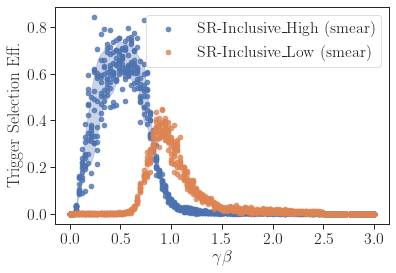

In [13]:
gbetaRep = np.tile(gbeta,10)
randHigh = [getTrackEff(gb,sr='High',use='smear') for gb in gbetaRep]
randLow = [getTrackEff(gb,sr='Low',use='smear') for gb in gbetaRep]

plt.scatter(gbetaRep,randHigh,color = a[0].get_color(),alpha=0.8,label='SR-Inclusive_High (smear)')
plt.fill_between(gbeta,effHighM,effHighP,color = a[0].get_color(), alpha=0.3)

plt.scatter(gbetaRep,randLow,color = b[0].get_color(),alpha=0.8,label='SR-Inclusive_Low (smear)')
plt.fill_between(gbeta,effLowM,effLowP,color = b[0].get_color(), alpha=0.3)

plt.xlabel(r'$\gamma \beta$')
plt.ylabel('Trigger Selection Eff.')
plt.legend()
plt.show()


### Define the Target Mass function

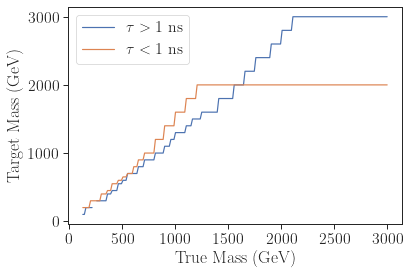

In [7]:
massVals = np.linspace(100.,3000,200)
tMassLong = [getTargetMass(m,0.0) for m in massVals]
tMassShort = [getTargetMass(m,1.0) for m in massVals]

plt.plot(massVals,tMassLong,label=r'$\tau > 1$ ns')
plt.plot(massVals,tMassShort,label=r'$\tau < 1$ ns')
plt.xlabel('True Mass (GeV)')
plt.ylabel('Target Mass (GeV)')
plt.legend()
plt.show()

### Define the signal selection efficiency by mass window

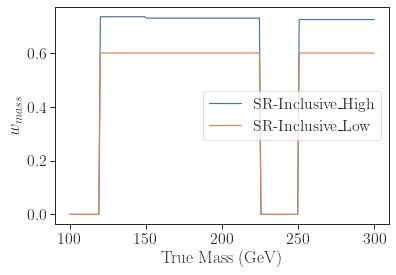

In [8]:
   
massVals = np.linspace(100.,300.,200)
tMassLong = [getTargetMass(m,0.0) for m in massVals]
wMassHigh = [getMassSelEff(mT,'High') if mT else 0.0 for mT in tMassLong]
wMassLow = [getMassSelEff(mT,'Low') if mT else 0.0 for mT in tMassLong]

plt.plot(massVals,wMassHigh,label='SR-Inclusive_High')
plt.plot(massVals,wMassLow,label='SR-Inclusive_Low')
plt.xlabel('True Mass (GeV)')
plt.ylabel(r'$w_{mass}$')
plt.legend()
plt.show()